# Pre-processing and Training Data Development - Capstone Two - King County House Sales

In [1]:
# Import required python libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Load 'kc_house_data.csv'
df = pd.read_csv('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/raw/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Column Descriptions:

* id - Unique ID for each sale
* date - Date of sale
* price - Sale price ($)
* bedrooms - Number of bedrooms
* bathrooms -  Number of bathrooms
* sqft_living - Area of interior living space (sq ft)
* sqft_lot - Area of land on lot (sq ft)
* floors - Number of floors
* waterfront - Waterfront location
* view - Rating of property view (0-4)
* condition - Rating of property condition (1-5)
* grade - Rating of house construction and design quality (1-13)
* sqft_above - Area of interior living space above ground level (sq ft)
* sqft_basement - Area of interior living space below ground level (sq ft)
* yr_built - Year house was built
* yr_renovated - Year house was last renovated
* zipcode - Zipcode
* lat - latitude coordinate
* long - longitude coordinate
* sqft_living15 - Average area of interior living space of 15 nearest neighbors
* sqft_lot15 - Average are of lot of 15 nearest neighbors

In [4]:
# Create binary column for renovated
df['renovated'] = 0

df.loc[df['yr_renovated'] != 0, 'renovated'] = 1

In [5]:
# What percentage of homes have been renovated?
print(round(df['renovated'].sum() / len(df['renovated']) * 100, 2))

4.23


Approximately 4% of homes in the dataset have been renovated.

In [6]:
df['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

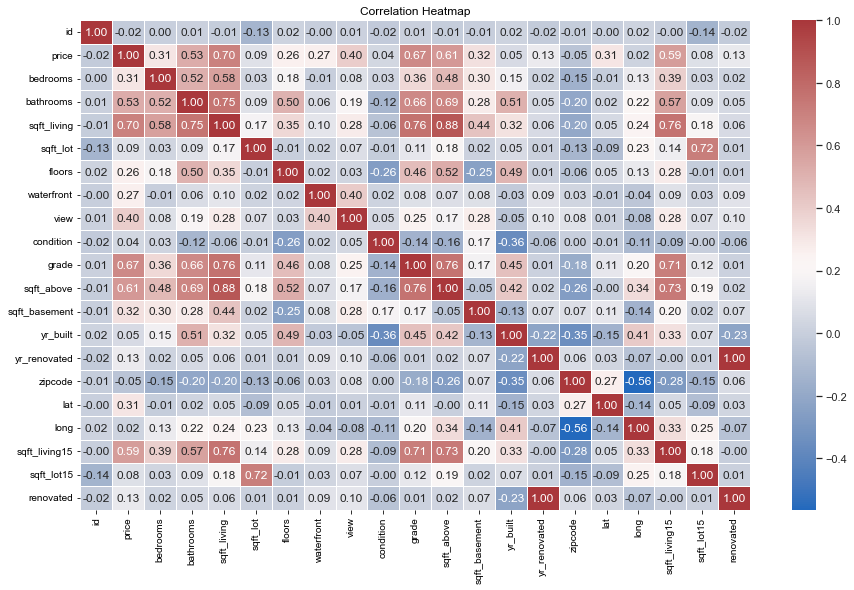

In [7]:
# Review heatmap showing Pearson correlation coefficients
fig, ax = plt.subplots(figsize=(15, 9))
sns.set(font_scale=1)
_ = sns.heatmap(data=df.corr(), annot=True, linewidths=0.5, cmap='vlag', fmt='0.2f').set(title='Correlation Heatmap')
plt.show()

In [8]:
# Drop columns sqft_above (highly correlated with sqft_living), yr_renovated, 
# sqft_living15, sqft_lot15 (highly correlated with sqft_living and sqft_lot, respectively), 
# lat, long (geographic information in zip code)
df.drop(columns=['sqft_above', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'date', 'id'], inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  renovated      21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [10]:
# Convert view, condition, grade, zipcode to categorical and one-hot encode
df[['view', 'condition', 'grade', 'zipcode']] = df[['view', 'condition', 'grade', 'zipcode']].astype('category')
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_basement', 'yr_built', 'renovated',
       'view_1', 'view_2', 'view_3', 'view_4', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipco

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,1955,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,400,1951,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,1933,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,910,1965,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,1987,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Set Y to price values
y = df['price']

In [14]:
# Set X to other column values, except price, date, yr_built, yr_renovated, lat, long 
# (date, yr_built, yr_renovated converted to integer and stored in other column. 
# lat and long are not useful for regression modeling, and the geographic information 
# is captured in the zipcode columns.)
X = df.drop(columns=['price'])

In [15]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,renovated,view_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,1955,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,400,1951,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,1933,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,910,1965,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,1987,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,2009,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,4,2.50,2310,5813,2.0,0,0,2014,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,2,0.75,1020,1350,2.0,0,0,2009,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,3,2.50,1600,2388,2.0,0,0,2004,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Create list of names
names = df.drop(columns=['price']).columns

In [17]:
names

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_basement', 'yr_built', 'renovated', 'view_1',
       'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059'

In [18]:
# What are the top Pearson correlation coefficients compared to price? 
df.corr()['price'].sort_values(ascending=False).head(20)

price            1.000000
sqft_living      0.702035
bathrooms        0.525138
grade_11         0.357412
grade_10         0.340799
sqft_basement    0.323816
bedrooms         0.308350
view_4           0.307932
grade_12         0.290834
zipcode_98004    0.271131
waterfront       0.266369
floors           0.256794
grade_9          0.235897
zipcode_98039    0.212558
grade_13         0.211803
zipcode_98040    0.204873
view_3           0.182880
zipcode_98112    0.169842
view_2           0.148418
zipcode_98006    0.133695
Name: price, dtype: float64

In [19]:
# Create scaler object
scaler = StandardScaler()

In [20]:
X = scaler.fit_transform(X)

In [21]:
X

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.0795761 ,
        -0.11456529, -0.12200584],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.0795761 ,
        -0.11456529, -0.12200584],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.0795761 ,
        -0.11456529, -0.12200584],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.0795761 ,
        -0.11456529, -0.12200584],
       [-0.39873715,  0.50022075, -0.52252773, ..., -0.0795761 ,
        -0.11456529, -0.12200584],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.0795761 ,
        -0.11456529, -0.12200584]])

In [22]:
X = pd.DataFrame(X, columns=names)

In [23]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,renovated,view_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.658681,-0.544898,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,9.027312,-0.079576,-0.114565,-0.122006
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,0.245141,-0.681079,4.758845,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.658681,-1.293892,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,1.397515,-0.204446,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.658681,0.544548,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.658681,1.293542,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.658681,1.463768,-0.210135,-0.124903,...,8.604949,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.658681,1.293542,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.658681,1.123316,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006


In [24]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,renovated,view_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
167,0.676485,0.500221,0.653405,-0.256110,0.936506,-0.087173,-0.658681,0.953090,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
12412,0.676485,-0.473621,0.283204,-0.242083,-0.915427,-0.087173,1.985000,-1.600298,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
7691,0.676485,0.175607,0.119880,-0.146959,0.936506,-0.087173,-0.658681,0.238141,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
12460,-1.473959,-0.473621,0.196098,6.418588,0.936506,-0.087173,0.177355,1.157361,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
9099,0.676485,-0.473621,0.032774,6.050501,-0.915427,-0.087173,-0.658681,0.272187,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.398737,-0.798235,-1.175824,-0.197804,-0.915427,-0.087173,-0.658681,-0.817259,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
21575,-0.398737,0.500221,1.096558,-0.243966,0.936506,-0.087173,-0.658681,1.463768,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
5390,-0.398737,0.500221,0.043662,-0.249326,0.936506,-0.087173,-0.658681,1.123316,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
860,-2.549182,-1.772078,-1.850897,-0.002583,-0.915427,-0.087173,-0.658681,-0.272536,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,8.907622,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006


In [26]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_basement,yr_built,renovated,view_1,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
735,0.676485,0.175607,-0.010779,-0.150025,0.936506,-0.087173,-0.658681,0.510503,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
2830,1.751707,1.149449,0.892947,-0.202247,-0.915427,-0.087173,1.759044,0.204096,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
4106,0.676485,0.500221,1.840227,-0.101739,0.936506,-0.087173,-0.658681,0.885000,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
16218,-0.398737,1.798677,2.700400,-0.012047,0.936506,-0.087173,-0.658681,0.646684,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
19964,-0.398737,0.500221,0.511858,-0.234937,0.936506,-0.087173,-0.658681,1.123316,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,-0.398737,0.500221,0.141657,-0.195728,0.936506,-0.087173,-0.658681,0.476458,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
14393,-0.398737,-0.149007,-0.293874,-0.256086,-0.915427,-0.087173,1.216751,-2.213112,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
6899,-0.398737,-1.447464,-1.012500,-0.200557,-0.915427,-0.087173,-0.658681,-0.578943,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006
85,-0.398737,-0.798235,0.065439,-0.277815,0.936506,-0.087173,-0.116388,-1.566253,-0.210135,-0.124903,...,-0.116212,-0.051423,-0.145157,-0.10905,-0.112263,-0.109267,-0.110775,-0.079576,-0.114565,-0.122006


In [27]:
y_train

167      807100.0
12412    570000.0
7691     320000.0
12460    649000.0
9099     568000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 15129, dtype: float64

In [28]:
y_test

735       365000.0
2830      865000.0
4106     1038000.0
16218    1490000.0
19964     711000.0
           ...    
12606     412000.0
14393     760000.0
6899      410500.0
85        940000.0
21363     410000.0
Name: price, Length: 6484, dtype: float64

In [29]:
# Write df, X_train, X_test, y_train, y_test to csv files
with open('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/df_edit.csv', 'w') as file:
    df.to_csv(file)

with open('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/X_train.csv', 'w') as file:
    X_train.to_csv(file)

with open('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/X_test.csv', 'w') as file:
    X_test.to_csv(file)

with open('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/y_train.csv', 'w') as file:
    y_train.to_csv(file)
    
with open('/Users/mitchmodlich/Desktop/Springboard_Data_Science/Springboard/KingCountyHouseSales/data/processed/y_test.csv', 'w') as file:
    y_test.to_csv(file)